In [35]:
#imports
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

In [36]:
#read in data
mb = pd.read_csv("/Users/ajaypatel8/Downloads/Metabolic Syndrome.csv")

In [37]:
#impute missing values
numerical_cols = mb.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = mb.select_dtypes(include=['object']).columns

imputer_num = SimpleImputer(strategy='mean')
imputer_cat = SimpleImputer(strategy='most_frequent')

mb[numerical_cols] = imputer_num.fit_transform(mb[numerical_cols])
mb[categorical_cols] = imputer_cat.fit_transform(mb[categorical_cols])

#one-hot encode categorical variables
encoder = OneHotEncoder(drop='first', sparse=False)
X_encoded = pd.DataFrame(encoder.fit_transform(mb[categorical_cols]), columns=encoder.get_feature_names_out(categorical_cols))
X = pd.concat([mb[numerical_cols], X_encoded], axis=1)

/usr/local/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [38]:
#perform PCA // not including MetabolicSyndrome in the PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

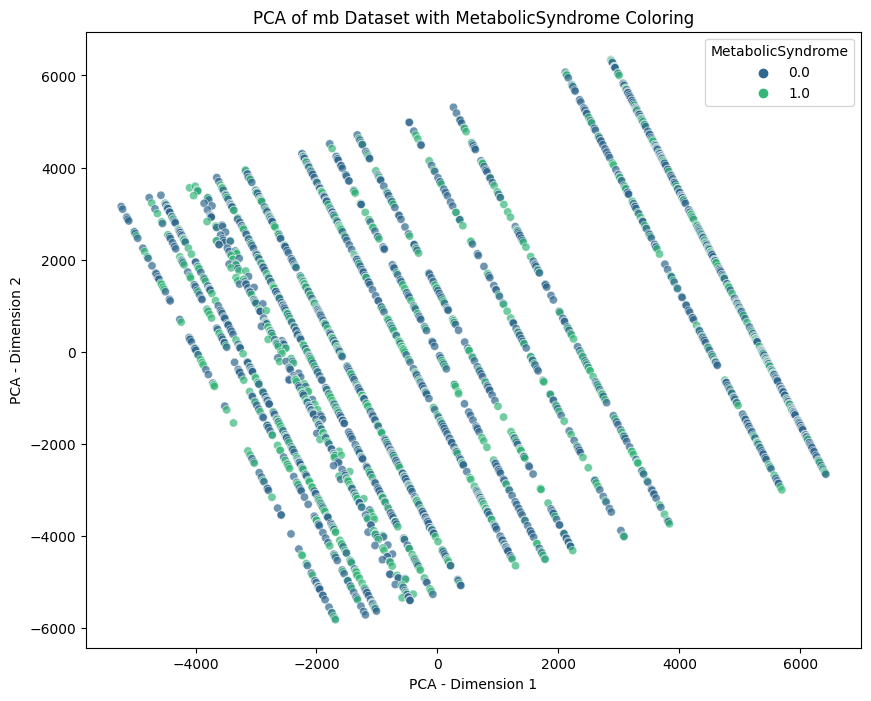

In [39]:
#dataframe for PCA results
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['MetabolicSyndrome'] = mb['MetabolicSyndrome']

#plot the results -> shows multicollinearity
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='MetabolicSyndrome', data=pca_df, palette='viridis', alpha=0.7)
plt.title('PCA of mb Dataset with MetabolicSyndrome Coloring')
plt.xlabel('PCA - Dimension 1')
plt.ylabel('PCA - Dimension 2')
plt.legend(title='MetabolicSyndrome', loc='upper right')
plt.show()